#### Overview of the problem

- A bike-sharing system is a service where bikes are made available for shared use on a short-term basis, either for a fee or for free. Many bike-sharing systems allow users to borrow a bike from a "dock," which is typically computer-controlled. The user enters payment information, and the system unlocks the bike, which can be returned to another dock within the same system.
- A US bike-sharing provider, BoomBikes, has recently suffered considerable dips in revenue due to the ongoing Corona pandemic. The company is finding it difficult to sustain operations in the current market scenario. To overcome this challenge, they have decided to develop a thoughtful business plan to accelerate revenue once the lockdown ends and the economy recovers.
- In this endeavor, BoomBikes aims to understand the demand for shared bikes among people after the national quarantine due to Covid-19 ends. They plan to use these insights to prepare themselves to cater to the public's needs once the situation improves, differentiate from competitors, and generate significant profits.
- Based on meteorological surveys and people's habits, the service provider has gathered a large dataset on daily bike demand across the American market, capturing various influencing factors.

#### Following are to be determined
- Which variables are significant in predicting the demand for shared bikes ?
- How well those variables describe the bike demand ?

In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppresing Warnings

import warnings
warnings.filterwarnings('ignore')

# Importing Stats Model - Linear Regression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing Scikit-Learn Libraries for Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing Feature Selection and Model Building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Data Reading and Understanding

In [3]:
# Loading the Dataset

day_df = pd.read_csv("day.csv")

In [4]:
# Display Top 5 Rows using head function

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Fetch the Shape of the dataframe

day_df.shape

# 730 Rows
# 16 Columns

(730, 16)

In [6]:
# Fetch the data types of all columns

day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# Fetch statistical data of all numerical columns

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking for Null Values if any in the Dataset

day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# Overview of the Dataframe 

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [18]:
# Based on the Initial Analysis, Columns instant & dteday are being dropped.
# instant - On observing the data, instant column is more of unique identifier assigned to each row. Since it will not aid much, dropping the column
# dteday - Since we have seperate columns year and month, the dteday is redundant in nature and will not aid anything to analysis. Hence, dropping the columns

day_df.drop(['instant','dteday'],axis=1,inplace=True)

In [20]:
# Fetch the Shape of the dataframe again post dropping the columns

day_df.shape

# 730 Rows
# 16 to 14 Columns post dropping

(730, 14)

In [22]:
# Based on the Data Dictionary, noticed the columns Season, Weathersit and mnth columns can be categorical. 
# Hence, Converting the data type to categorical that will aid for EDA

day_df['season']=day_df['season'].astype('category')
day_df['weathersit']=day_df['weathersit'].astype('category')
day_df['mnth']=day_df['mnth'].astype('category')

In [24]:
# Re-Fetching the Overview of the Dataframe 

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [26]:
# Mapping the data of the category variables to aid the analysis

# Map for 'season' column

day_df['season'] = day_df['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Map for 'weathersit' column

day_df['weathersit'] = day_df['weathersit'].map({1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'})

# Map for 'mnth' column

day_df['mnth'] = day_df['mnth'].map({
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
    7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'
})

# Map for 'weekday' column

day_df['weekday'] = day_df['weekday'].map({
    0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'
})

In [28]:
# Fetching the Top 5 Rows to verify the mapping

day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Exploratory Data Analysis - Univariate Analysis

In [31]:
# Fetch Numeric Columns

Num_Cols = day_df.select_dtypes(include=['number']).columns.tolist()

print(Num_Cols)

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [33]:
# Categorising the Numerical Columns

Num_Features = ['temp', 'atemp', 'hum', 'windspeed']
Num_Counts = ['casual', 'registered', 'cnt']

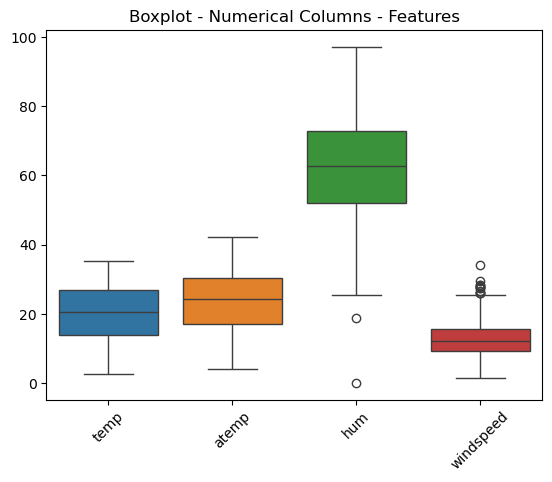

In [35]:
# Creating the Box Plot for Numerical Columns - Features

sns.boxplot(data=day_df[Num_Features]) # ['temp', 'atemp', 'hum', 'windspeed']

# Adding title and labels

plt.title('Boxplot - Numerical Columns - Features')
plt.xticks(rotation=45)
plt.show()

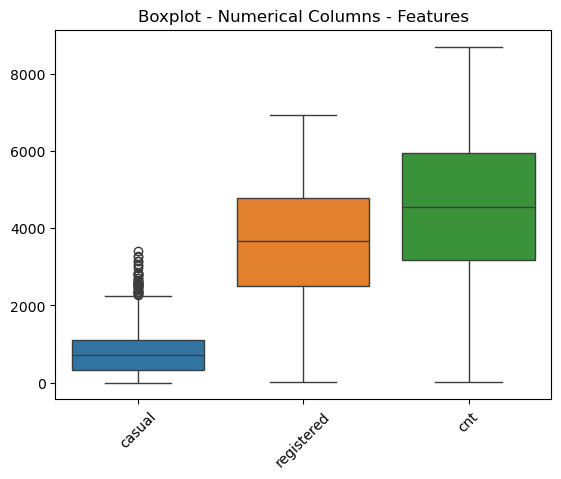

In [37]:
# Creating the Box Plot for Numerical Columns - Counts

sns.boxplot(data=day_df[Num_Counts]) # ['temp', 'atemp', 'hum', 'windspeed']

# Adding title and labels

plt.title('Boxplot - Numerical Columns - Features')
plt.xticks(rotation=45)
plt.show()

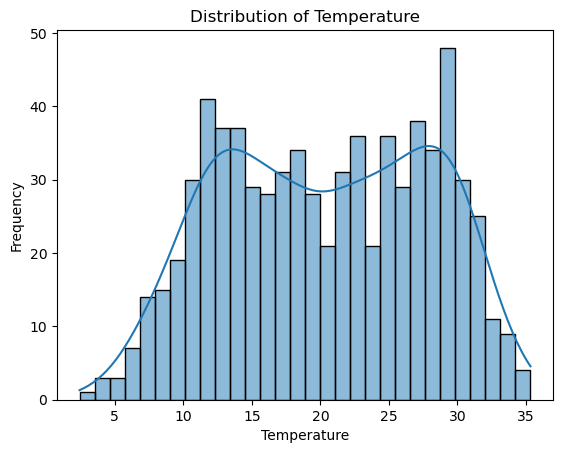

In [39]:
# Creating the Hist Plot for Numerical Column - Temperature

sns.histplot(day_df['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

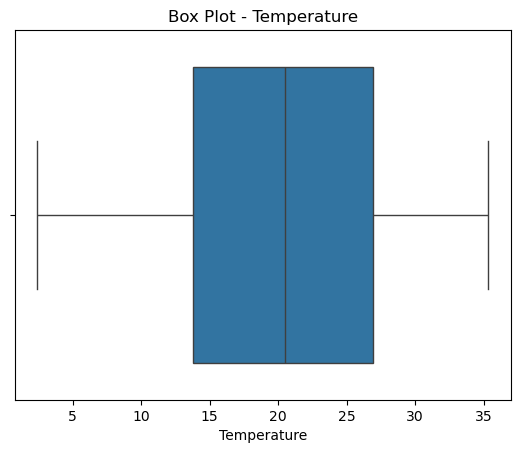

In [41]:
# Creating the Box Plot for Numerical Column - Temperature

sns.boxplot(x=day_df['temp'])
plt.title('Box Plot - Temperature')
plt.xlabel('Temperature')
plt.show()

# No Outliers noticed & data is spread from 5 to 35 degree celsius

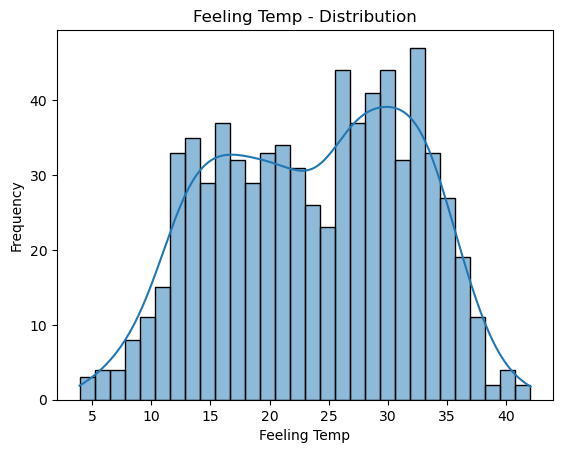

In [43]:
# Creating the Hist Plot for Numerical Column - Feeling Temperature

sns.histplot(day_df['atemp'], bins=30, kde=True)
plt.title('Feeling Temp - Distribution')
plt.xlabel('Feeling Temp')
plt.ylabel('Frequency')
plt.show()

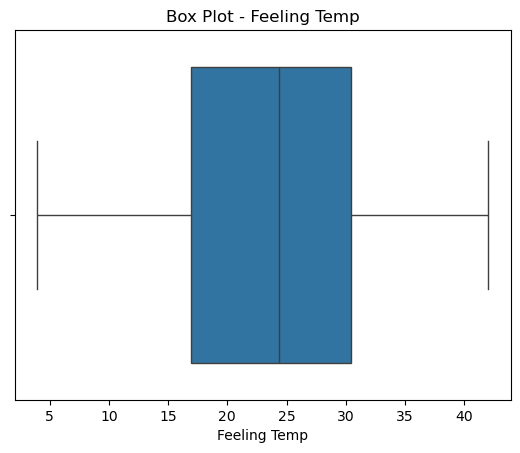

In [45]:
# Creating the Box Plot for Numerical Column - Feeling Temperature

sns.boxplot(x=day_df['atemp'])
plt.title('Box Plot - Feeling Temp')
plt.xlabel('Feeling Temp')
plt.show()

# No Outliers noticed & data is spread from 5 to 40 degree celsius

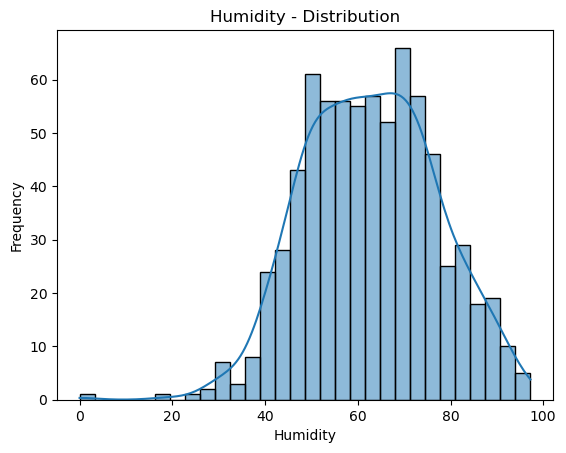

In [47]:
# Creating the Hist Plot for Numerical Column - Humidity

sns.histplot(day_df['hum'], bins=30, kde=True)
plt.title('Humidity - Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

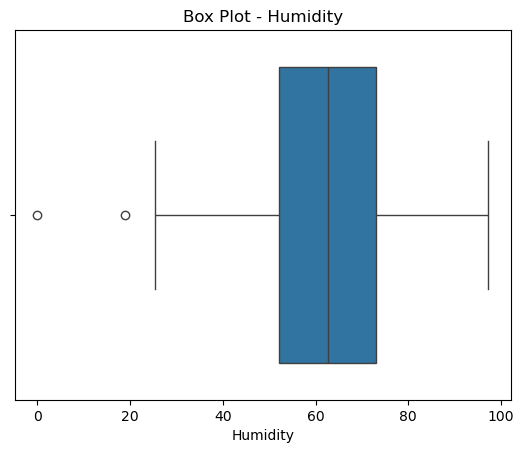

In [49]:
# Creating the Box Plot for Numerical Column - Humidity

sns.boxplot(x=day_df['hum'])
plt.title('Box Plot - Humidity')
plt.xlabel('Humidity')
plt.show()

# No Outliers noticed & data is spread from 0% to 100%

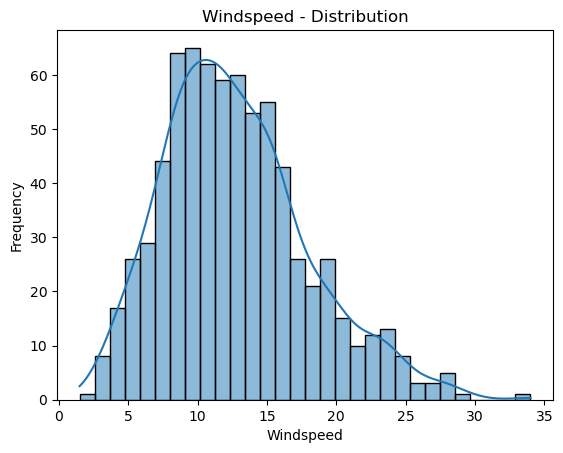

In [51]:
# Creating the Hist Plot for Numerical Column - Wind Speed

sns.histplot(day_df['windspeed'], bins=30, kde=True)
plt.title('Windspeed - Distribution')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

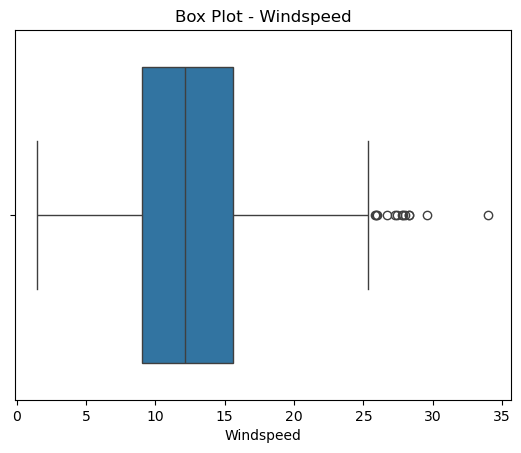

In [53]:
# Creating the Box Plot for Numerical Column - Windspeed

sns.boxplot(x=day_df['windspeed'])
plt.title('Box Plot - Windspeed')
plt.xlabel('Windspeed')
plt.show()

# Noticed few Outliers & data is consistent which is spread from 0 to 35

#### Exploratory Data Analysis - Bivariate Analysis

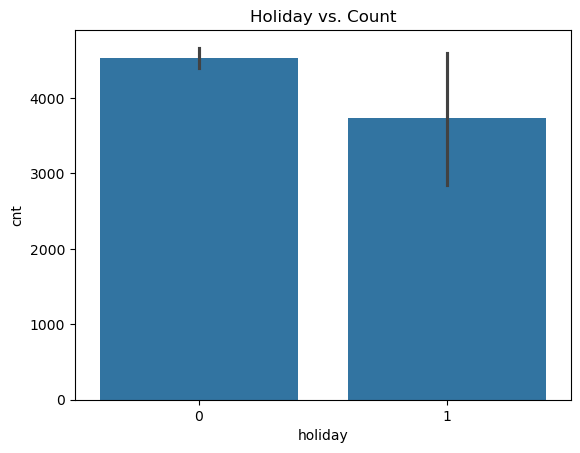

In [56]:
# Plot for Holiday vs. Count

sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title('Holiday vs. Count')
plt.show()

# Noticed lesser rentals when it is a holiday

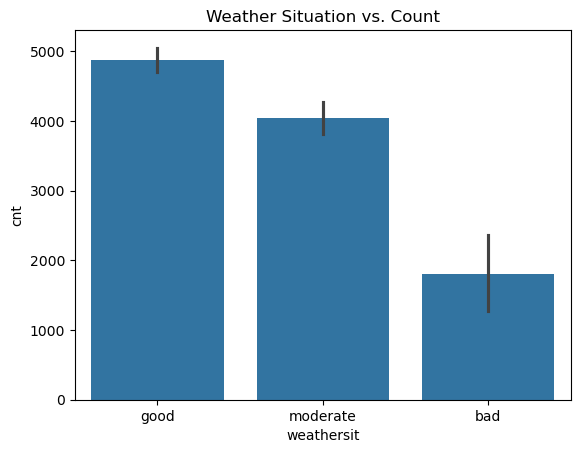

In [58]:
# Plot for Weather Situation vs. Count

sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title('Weather Situation vs. Count')
plt.show()

# Noticed More rentals when the weather situation is good

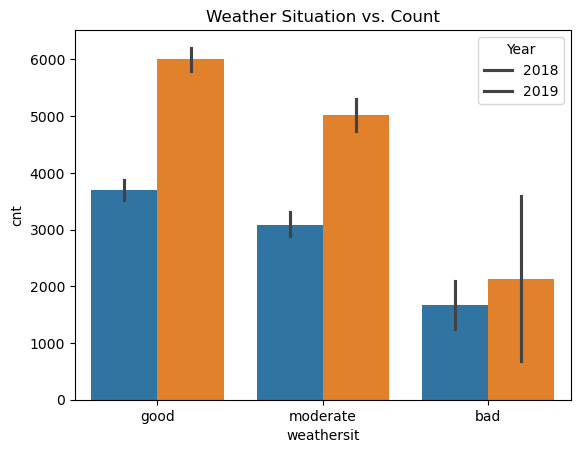

In [62]:
# Plotting the Year wise Rental Count based on the Weather Condition

sns.barplot(x='weathersit', y='cnt', data=day_df, hue='yr')
plt.title('Weather Situation vs. Count')
plt.legend(title='Year', labels=['2018', '2019'])
plt.show()

# Noticed More rentals in year 2019 compared to year 2018

Text(0.5, 1.0, 'Month vs. Count')

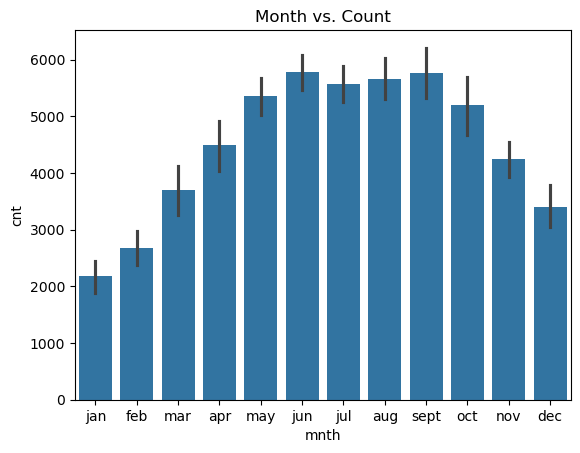

In [176]:
# Plot for Month vs. Count

sns.barplot(x='mnth', y='cnt', data=day_df)
plt.title('Month vs. Count')
plt.show()

# Noticed More rentals from the Month of May to October

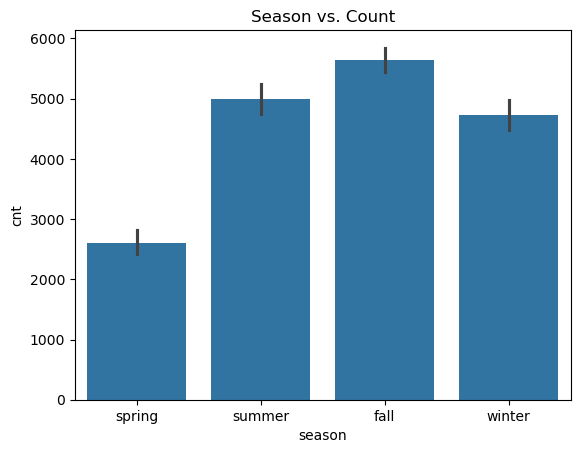

In [162]:
# Seasons vs Rental Count

sns.barplot(x='season', y='cnt', data=day_df)
plt.title('Season vs. Count')
plt.show()

# Noticed Higher Rentals in Fall Season

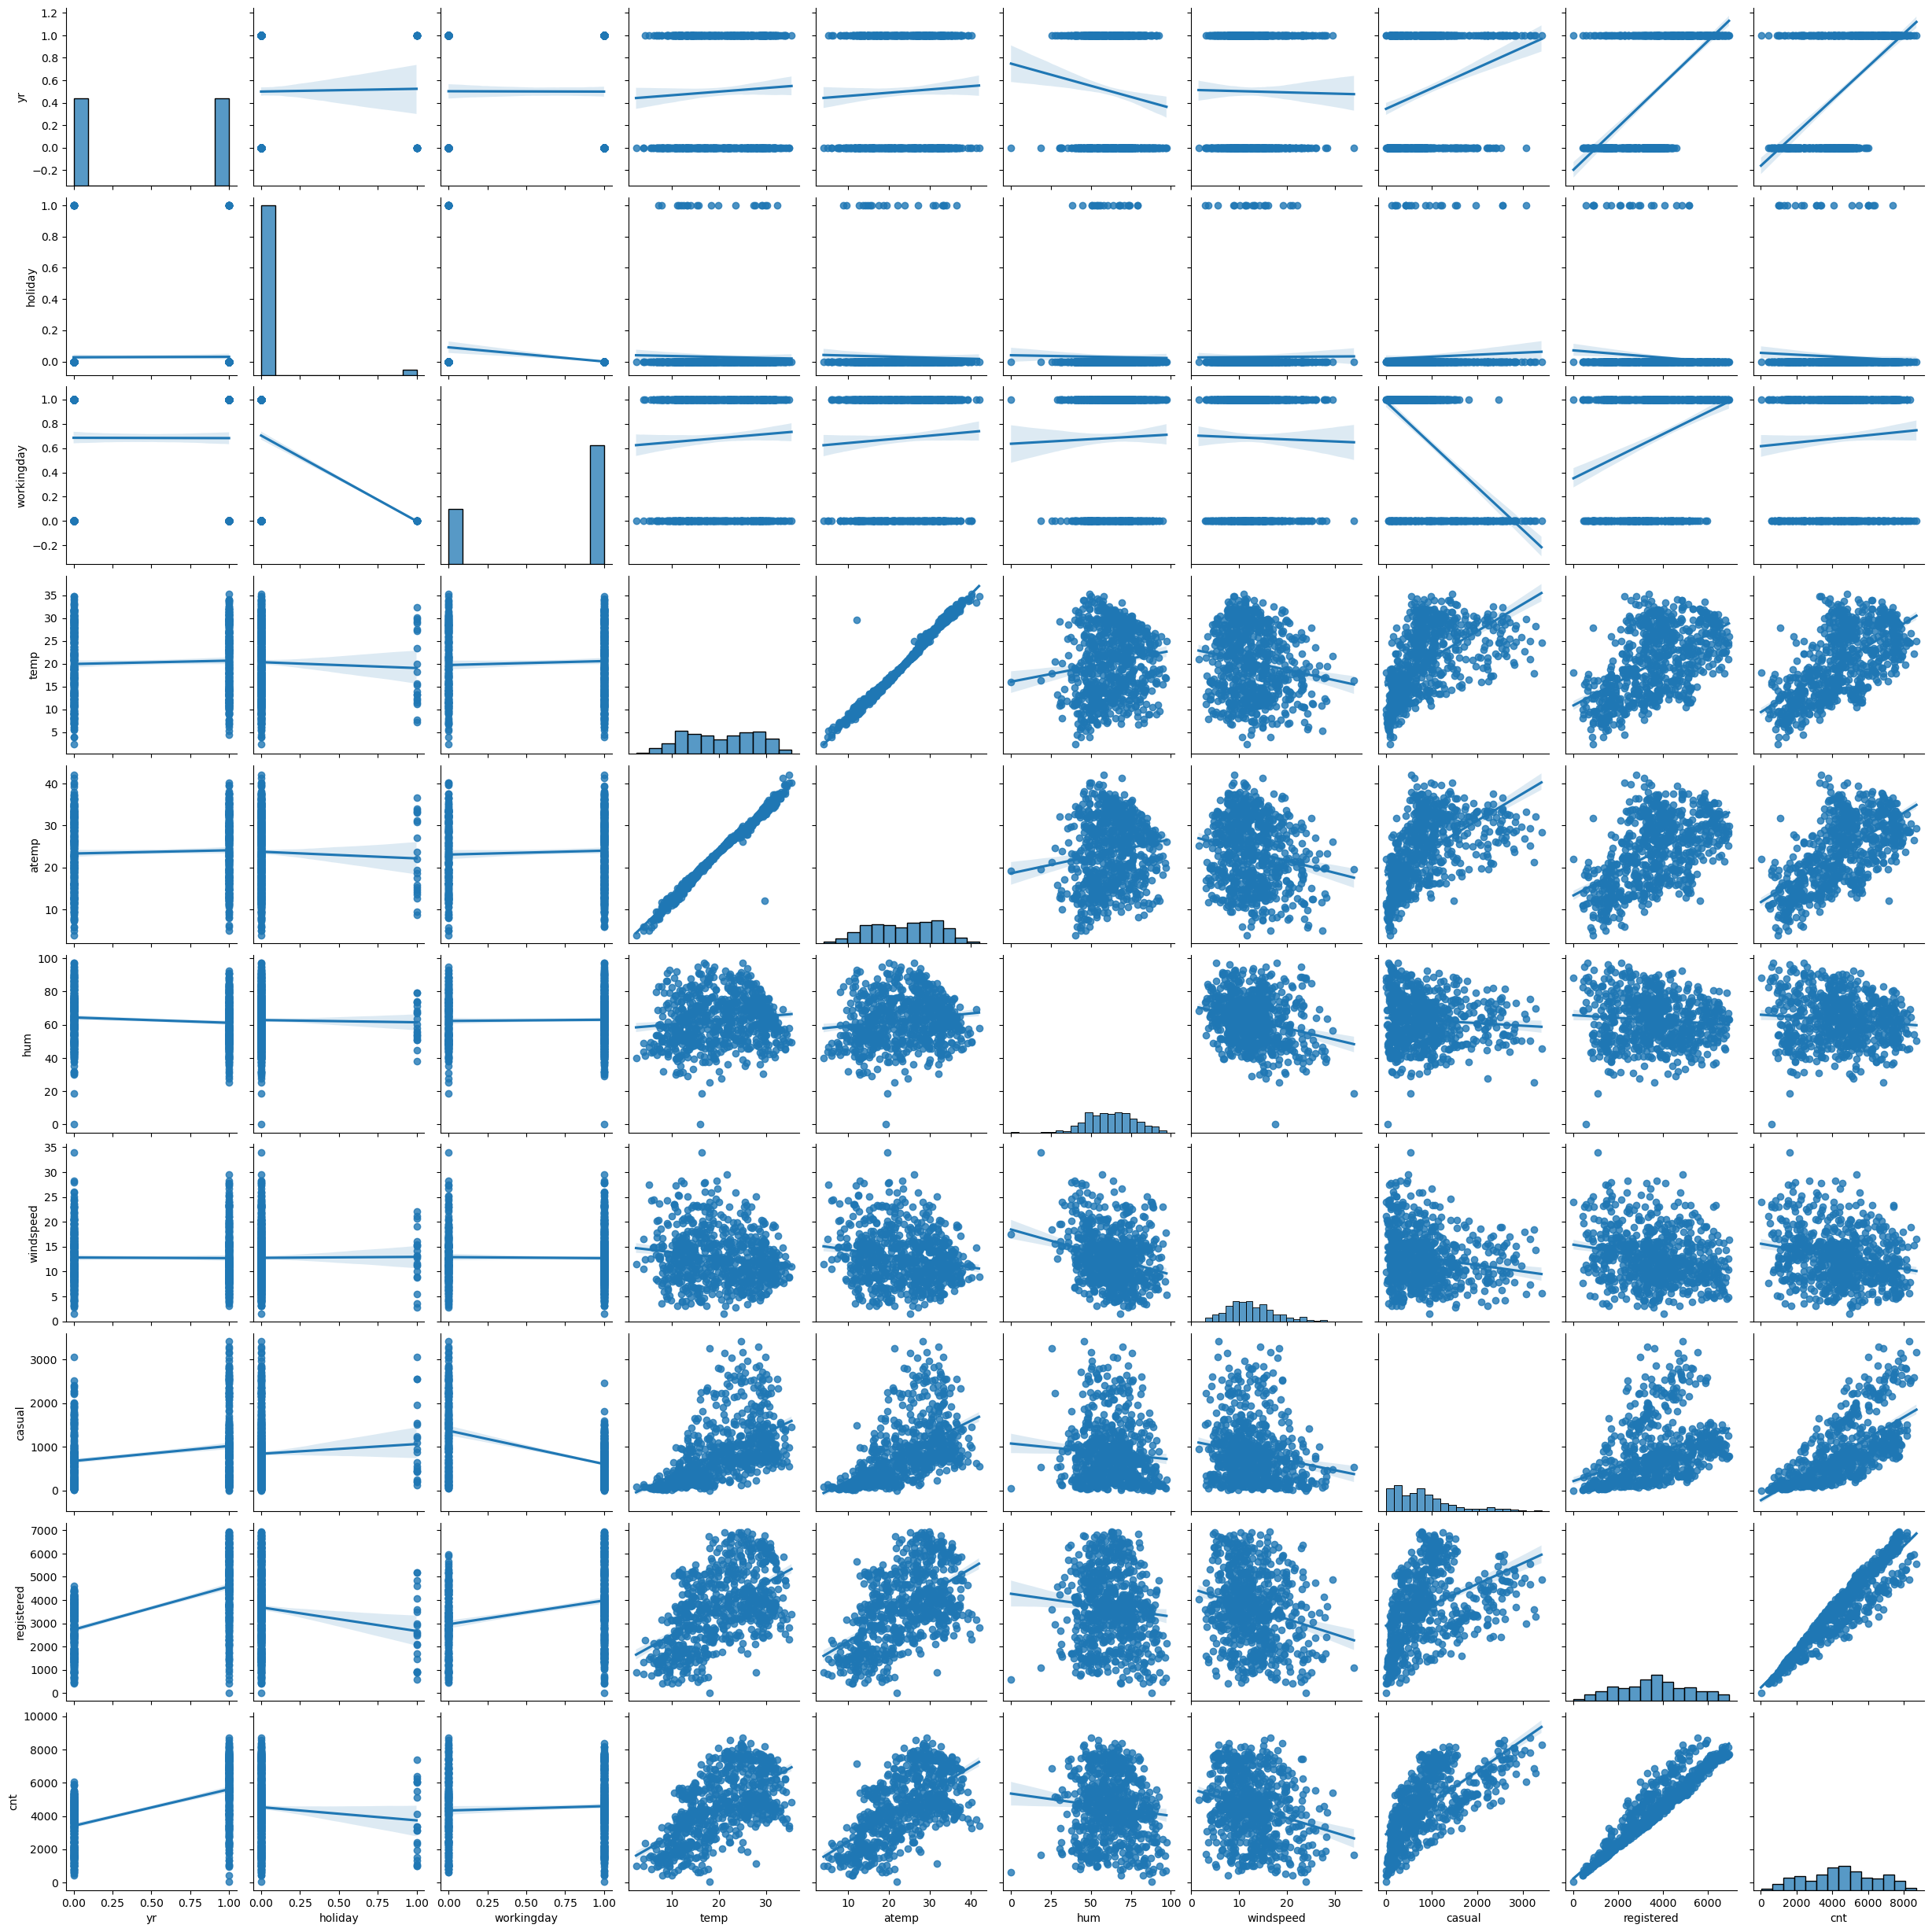

In [150]:
# Plotting Pair Plot to observe the linearity b/w the varaibles

sns.pairplot(data=day_df,vars=Num_Cols, kind="reg")
plt.show()

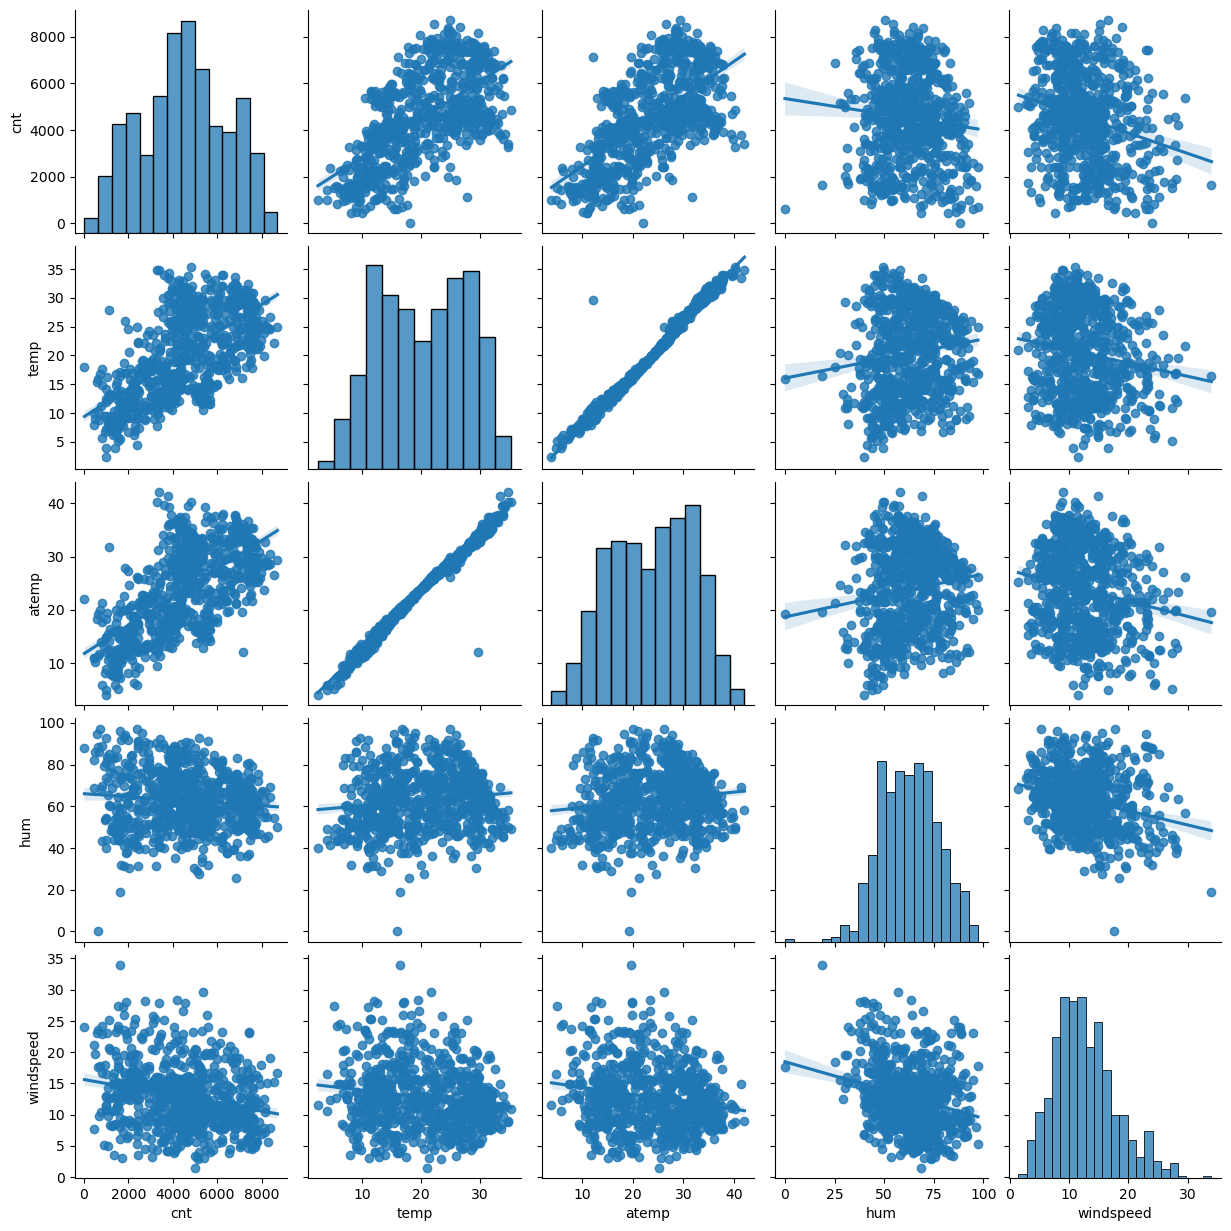

In [156]:
# Removing the columns yr, holiday & workingday as no linear relationship is observerd. Re-Plotting the required columns again

Reqd_Columns=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=day_df,vars=Reqd_Columns, kind="reg")
plt.show()

# Noticed Linear Relationship between temp, atemp & cnt & high correlation b/w temp & atemp

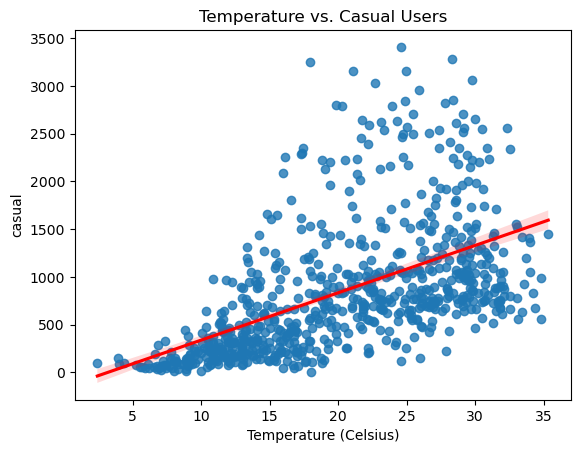

In [113]:
# Understanding the Temperature vs Casual Users

sns.regplot(x='temp', y='casual', data=day_df, line_kws={'color': 'red'})
plt.title('Temperature vs. Casual Users')
plt.xlabel('Temperature (Celsius)')
plt.show()

# Noticed Positive Correlation b/w Temperature & Casual Users (i.e., As Temp Increases Number of Users renting bike increases)

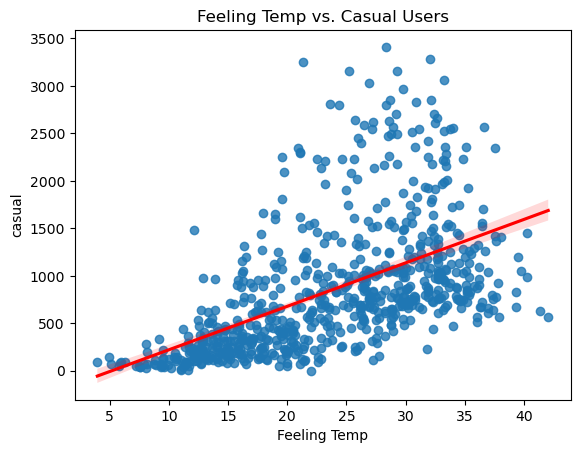

In [119]:
# Understanding the Feeling Temperature vs Casual Users

sns.regplot(x='atemp', y='casual', data=day_df, line_kws={'color': 'red'})
plt.title('Feeling Temp vs. Casual Users')
plt.xlabel('Feeling Temp')
plt.show()

# Noticed Positive Correlation b/w Feeling Temperature & Casual Users (i.e., As Feeling Temp Increases Number of Users renting bike increases)

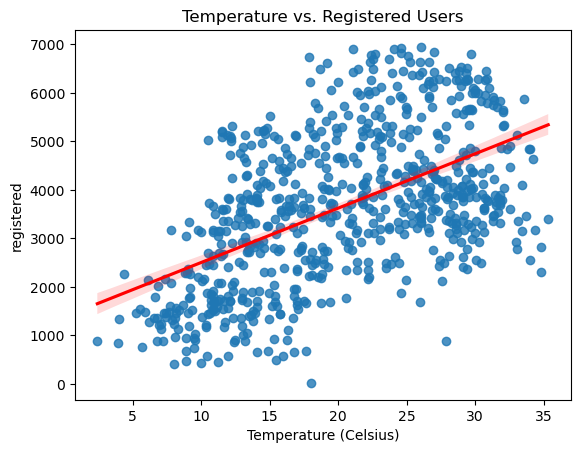

In [125]:
# Understanding the Temperature vs Registered Users

sns.regplot(x='temp', y='registered', data=day_df, line_kws={'color': 'red'})
plt.title('Temperature vs. Registered Users')
plt.xlabel('Temperature (Celsius)')
plt.show()

# Noticed weaker Correlation b/w Temperature & Registered Users

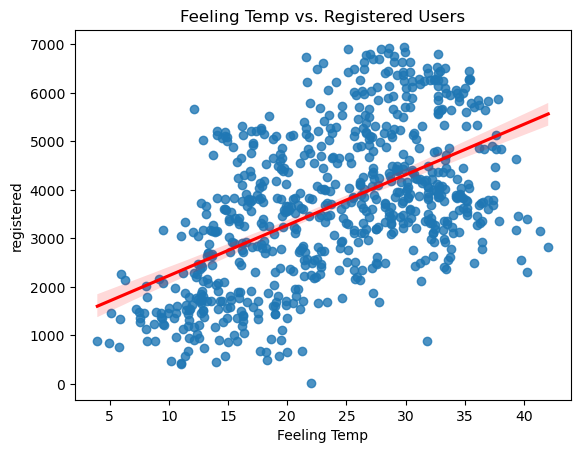

In [127]:
# Understanding the Feeling Temperature vs Registered Users

sns.regplot(x='atemp', y='registered', data=day_df, line_kws={'color': 'red'})
plt.title('Feeling Temp vs. Registered Users')
plt.xlabel('Feeling Temp')
plt.show()

# Noticed weaker Correlation b/w Feeling Temperature & Registered Users

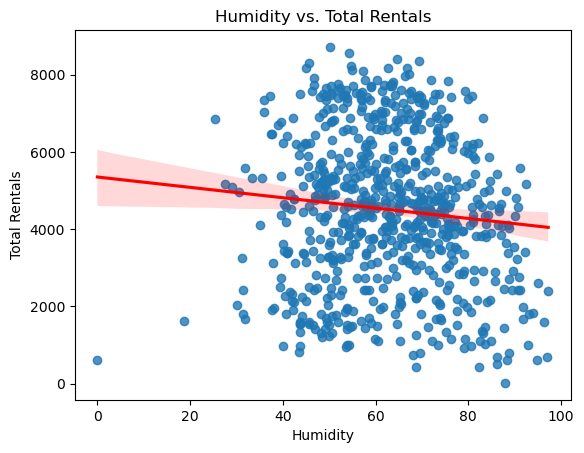

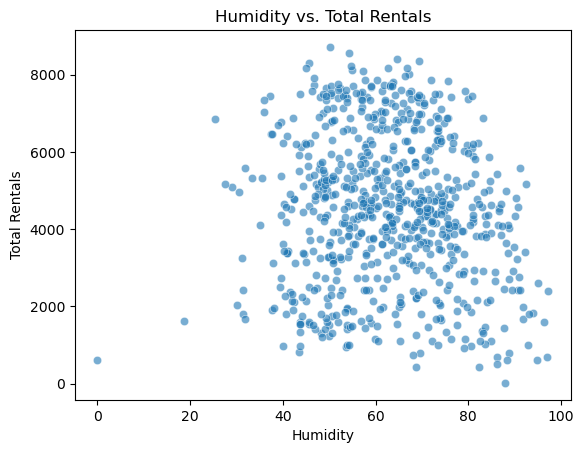

In [133]:
# Humidity vs Total Rentals

# Reg Plot

sns.regplot(x='hum', y='cnt', data=day_df, line_kws={'color': 'red'})
plt.title('Humidity vs. Total Rentals')
plt.xlabel('Humidity')
plt.ylabel('Total Rentals')
plt.show()

# Scatter Plot 

sns.scatterplot(x='hum', y='cnt', data=day_df, alpha=0.6)
plt.title('Humidity vs. Total Rentals')
plt.xlabel('Humidity')
plt.ylabel('Total Rentals')
plt.show()

# No Trend can be observed b/w Humidity & Total Rentals

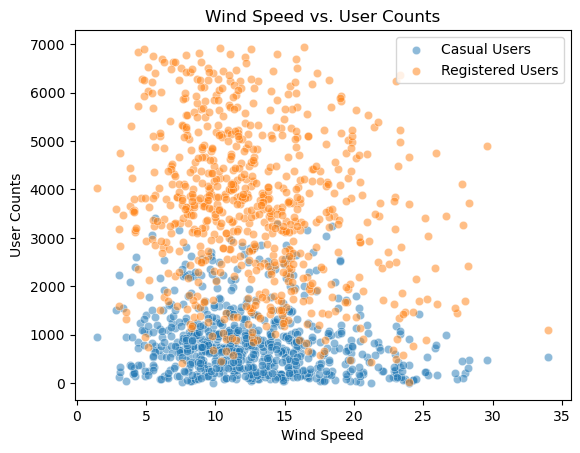

In [143]:
# Wind Speed Vs User Counts

sns.scatterplot(x='windspeed', y='casual', data=day_df, label='Casual Users', alpha=0.5)
sns.scatterplot(x='windspeed', y='registered', data=day_df, label='Registered Users', alpha=0.5)
plt.title('Wind Speed vs. User Counts')
plt.xlabel('Wind Speed')
plt.ylabel('User Counts')
plt.legend()
plt.show()

# Noticed some clusters based on the Windspeed

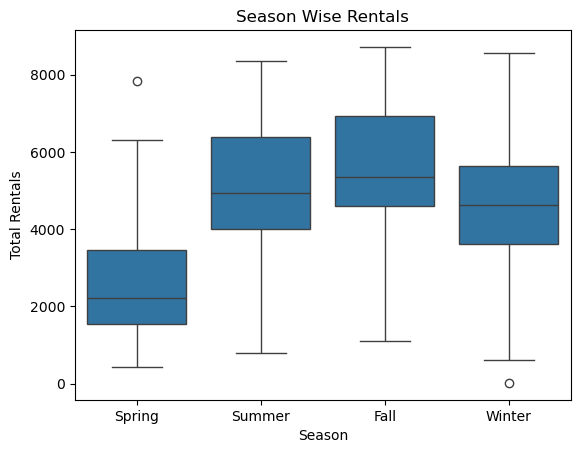

In [147]:
# Total Rentals vs Seasons

sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Season Wise Rentals')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Noticed more rentals in the Fall Seasons compared to other seasons & Spring season has lesser rentals compared to other seasons

#### Exploratory Data Analysis - Multivariate Analysis

In [205]:
# Filter only numerical columns
Corr_Df = day_df[day_df.select_dtypes(include=['number']).columns.tolist()]

# Displaying Correlation Dataframe Columns

print(Corr_Df.columns.tolist())

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


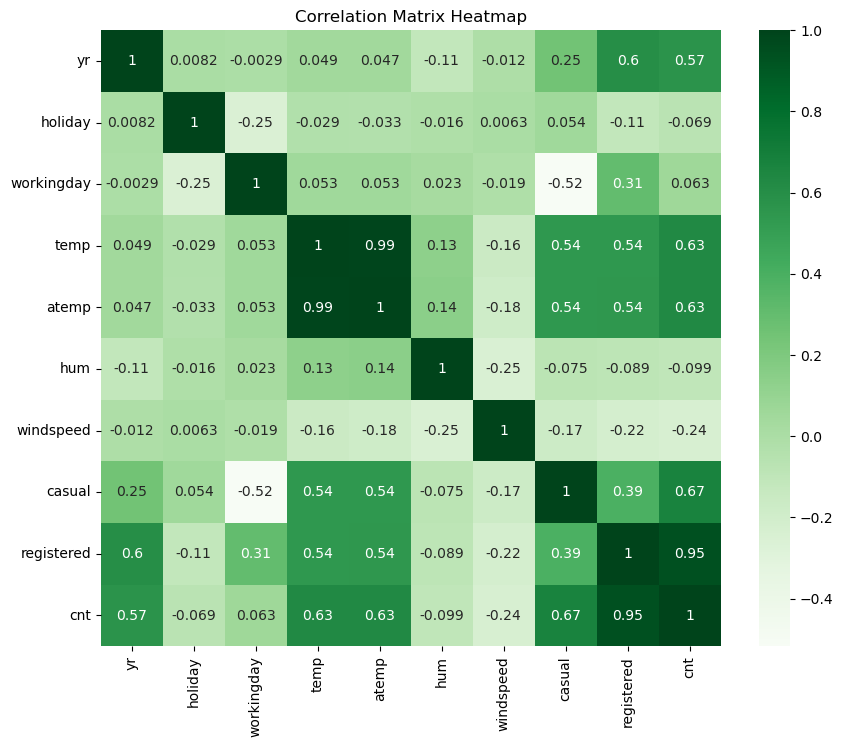

In [215]:
# Plot the correlation matrix usinhg heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(Corr_Df.corr(), cmap='Greens', annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Temp & atemp are highly correlated - Multicolinearity
# Holidays & Working days are negatively correlated
# Temp, atemp, windspeed & hum has positive correlation with casual, registerd & cnt

#### Data Preparation

In [218]:
# Creating Dummy Variables for Categorical Columns

day_df = pd.get_dummies(day_df, columns=['mnth', 'weekday', 'season', 'weathersit'], drop_first=True, dtype=int)

In [228]:
# Fetching the columns, post creating dummies

print(day_df.columns.tolist())

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'season_summer', 'season_fall', 'season_winter', 'weathersit_moderate', 'weathersit_bad']


In [224]:
# Fetch the shape of dataframe again, post creating dummies

day_df.shape

(730, 32)

In [230]:
# Dropping the columns Casual & Registered users count both counts are part of cnt

day_df.drop(['casual','registered'],axis=1,inplace=True)

In [232]:
# Fetch the shape of dataframe again

day_df.shape

(730, 30)

In [234]:
# Displaying the Top 5 Rows using head function 

day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_feb,mnth_mar,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_summer,season_fall,season_winter,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Splitting data into Train & Test Data

In [237]:
# Set random seed for reproducibility - random operations

np.random.seed(0)  

# Perform 70:30 split on the data loaded

df_train, df_test = train_test_split(day_df, train_size=0.70, test_size=0.30, random_state=100)

In [239]:
# Fetch the Shapes of both train and test data sets

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [241]:
# Fetch Statistical Summary for Training Dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_feb,mnth_mar,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_summer,season_fall,season_winter,weathersit_moderate,weathersit_bad
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Performing Scaling on Train Dataset

In [248]:
# Initializing the Scaler Object

scaler = MinMaxScaler()

# Performing the Scaling Operation on Required Columns

Reqd_Cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Performing Fit_Transform on Train Dataset

df_train[Reqd_Cols] = scaler.fit_transform(df_train[Reqd_Cols])

# Performing Transfor Test Dataset

df_test[Reqd_Cols] = scaler.transform(df_test[Reqd_Cols])

In [250]:
# Verifying the Data post performing scaling Operation on Train Dataset using describe function

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_feb,mnth_mar,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_summer,season_fall,season_winter,weathersit_moderate,weathersit_bad
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [252]:
# Creating X, y Variables
# Train Dataset 

y_train = df_train.pop('cnt') # Dependent Variable
X_train = df_train # Independent Variable

# Test Dataset

y_test = df_test.pop('cnt') # Dependent Variable
X_test = df_test # Independent Variable

In [254]:
# Fetch Shapes of Train Dataset

print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


#### Building the Model

In [257]:
# Leveraging the StatsModel library to build the linear regression model

# Adding the Constant
X_train_sm = sm.add_constant(X_train)

# Initializing the Model Object

stats_lr_1 = sm.OLS(y_train, X_train_sm)

# Fitting the Model on Train Dataset

stats_lr_model1 = stats_lr_1.fit()

In [264]:
# Displaying the Model Summary

stats_lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.42e-181
Time:                        19:25:55   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1563      0.023      6.668      0.000       0.110       0.202
yr                      0.2322      0.008     28.792      0.000       0.216       0.248
holiday                -0.0115      0.023     -0.505      0.614      -0.056       0.033
workingday              0.0747      0.011      7.009      0.000       0.054       0.096
temp                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                   0.0506      0.138      0.366      0.714      -0.221       0.322
hum                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
mnth_feb                0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_mar                0.0639      0.022      2.857      0.004       0.020       0.108
mnth_apr                0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_may                0.0873      0.036      2.412      0.016       0.016       0.158
mnth_jun                0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_jul                0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_aug                0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_sept               0.1444      0.037      3.853      0.000       0.071       0.218
mnth_oct                0.0703      0.034      2.041      0.042       0.003       0.138
mnth_nov                0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_dec                0.0170      0.027      0.641      0.522      -0.035       0.069
weekday_mon            -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_sat             0.0738      0.012      6.120      0.000       0.050       0.098
weekday_sun             0.0193      0.013      1.527      0.128      -0.006       0.044
weekday_thu            -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tue            -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wed            -0.0057      0.015     -0.384      0.701      -0.035       0.024
season_summer           0.0868      0.024      3.679      0.000       0.040       0.133
season_fall             0.0486      0.030      1.618      0.106      -0.010       0.108
season_winter           0.1540      0.026      5.932      0.000       0.103       0.205
weathersit_moderate    -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_bad         -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):       

- Noticed R-Squared Values as 0.853 which implies the model can explain 85.3% of Variance of the data
- Notice high P-values for features - holiday, atemp, various months & weekday which implies they have lesser significance on the data
- Overall, Model seems fine. However, refining the model by selecting best features to improve accuracy in the prediction

In [270]:
# Leveraging the RFE Method to select top 15 features

lm_Obj = LinearRegression()
lm_Obj.fit(X_train, y_train)

# Running RFE

rfe = RFE(estimator=lm_Obj, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

# Consolidating the Columns, Status & Ranking

rfe_results = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [274]:
# Displaying the Results

rfe_results

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_feb', False, 7),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 4),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 8),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 9),
 ('mnth_dec', False, 10),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [282]:
# Columns Selected - Post Applying RFE

Reqd_rfe_Columns = X_train.columns[rfe.support_]

print(Reqd_rfe_Columns.tolist())

['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sat', 'season_summer', 'season_fall', 'season_winter', 'weathersit_moderate', 'weathersit_bad']


In [284]:
# Columns Not Required - Post Applying RFE

NotReqd_rfe_Columns = X_train.columns[~rfe.support_]

print(NotReqd_rfe_Columns.tolist())

['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed']


In [286]:
# Final Train Dataset - Post Selecting Features suggsted by RFE

X_train_rfe = X_train[Reqd_rfe_Columns]

# Displaying First Five Rows of New Train Dataframe

X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_aug,mnth_sept,mnth_oct,weekday_sat,season_summer,season_fall,season_winter,weathersit_moderate,weathersit_bad
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,1,0,0,1,0


In [288]:
# Final Test Dataset - Post Selecting Features suggsted by RFE

X_test_rfe = X_test[Reqd_rfe_Columns]

# Displaying First Five Rows of New Test Dataframe

X_test_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_aug,mnth_sept,mnth_oct,weekday_sat,season_summer,season_fall,season_winter,weathersit_moderate,weathersit_bad
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,1,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,1,1,0
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,1,0,0,0,0


In [290]:
# Building a Model - Adding a Constant

X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)

In [292]:
# Initializing the Model Object

stats_lr_2 = sm.OLS(y_train, X_train_rfe)

# Fitting the Model on Train Dataset

stats_lr_model2 = stats_lr_2.fit()

In [294]:
# Displaying the Model Summary

stats_lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.89e-191
Time:                        19:41:06   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1950      0.029      6.791      0.000       0.139       0.251
yr                      0.2301      0.008     28.776      0.000       0.214       0.246
holiday                -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday              0.0446      0.012      3.877      0.000       0.022       0.067
temp                    0.4960      0.034     14.803      0.000       0.430       0.562
hum                    -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed              -0.1824      0.025     -7.200      0.000      -0.232      -0.133
mnth_aug                0.0475      0.017      2.745      0.006       0.013       0.081
mnth_sept               0.1178      0.017      6.895      0.000       0.084       0.151
mnth_oct                0.0442      0.017      2.565      0.011       0.010       0.078
weekday_sat             0.0533      0.015      3.676      0.000       0.025       0.082
season_summer           0.1175      0.015      7.985      0.000       0.089       0.146
season_fall             0.0295      0.022      1.346      0.179      -0.014       0.073
season_winter           0.1430      0.013     10.688      0.000       0.117       0.169
weathersit_moderate    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_bad         -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- No Significant change noticed in R-Squared value. Though only 15 Features are selected using RFE mechanism no significant chnage noticed. Thereby the selected features are significant
- Also, noticed lesser P-values on the features with slight significance here and there. 

#### Checking for Multi Collinearity before finalizing the models to understand if any redundant features are present

In [298]:
# Defining Variance Inflation Factor Function as it will play key role in determing the collinearity among the features

def VIF_Calculator(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [302]:
# Calculating VIF for the features selected using RFE

VIF_Values_rfe = VIF_Calculator(X_train_rfe)

# Display VIF Values

print(VIF_Values_rfe)

               Features    VIF
0                 const  53.48
12          season_fall   6.04
4                  temp   3.71
11        season_summer   2.60
13        season_winter   2.17
5                   hum   1.91
3            workingday   1.88
10          weekday_sat   1.79
7              mnth_aug   1.68
14  weathersit_moderate   1.58
9              mnth_oct   1.52
8             mnth_sept   1.40
15       weathersit_bad   1.26
6             windspeed   1.20
2               holiday   1.16
1                    yr   1.04


In [304]:
# Dropping the Season_fall column due to higher VIF

X_train_rfe.drop('season_fall',axis=1,inplace=True)
X_test_rfe.drop('season_fall',axis=1,inplace=True)

In [306]:
# Building a New Model on the Updated Dataframe

# Initializing the Model Object

stats_lr_3 = sm.OLS(y_train, X_train_rfe)

# Fitting the Model on Train Dataset

stats_lr_model3 = stats_lr_3.fit()

In [308]:
# Displaying the Model Summary

stats_lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.24e-192
Time:                        19:50:36   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1945      0.029      6.770      0.000       0.138       0.251
yr                      0.2292      0.008     28.743      0.000       0.213       0.245
holiday                -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday              0.0444      0.012      3.850      0.000       0.022       0.067
temp                    0.5301      0.022     24.136      0.000       0.487       0.573
hum                    -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed              -0.1857      0.025     -7.359      0.000      -0.235      -0.136
mnth_aug                0.0560      0.016      3.478      0.001       0.024       0.088
mnth_sept               0.1255      0.016      7.783      0.000       0.094       0.157
mnth_oct                0.0411      0.017      2.403      0.017       0.007       0.075
weekday_sat             0.0529      0.015      3.647      0.000       0.024       0.081
season_summer           0.1039      0.011      9.680      0.000       0.083       0.125
season_winter           0.1348      0.012     11.316      0.000       0.111       0.158
weathersit_moderate    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_bad         -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Analysis

In [313]:
# Predicting Values on Train Dataset

y_train_pred = stats_lr_model3.predict(X_train_rfe)

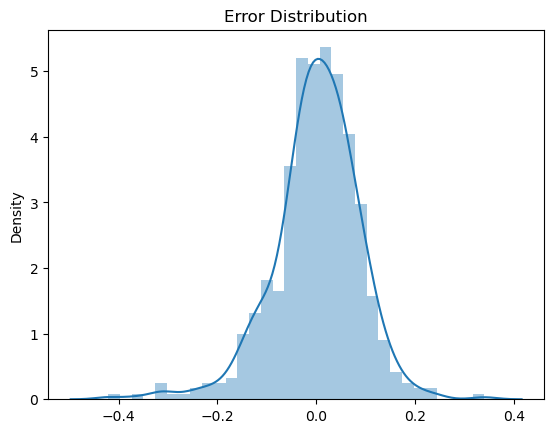

In [317]:
# Plotting the Residual Values of Train Dataset to check if it has Normal Distribution or Not

Residuals = y_train - y_train_pred

# Plotting the Residuals

sns.distplot(Residuals)
plt.title('Error Distribution')
plt.show()

# Residuals have Normal distribution which Implies the model built is satisfying the required assumptions

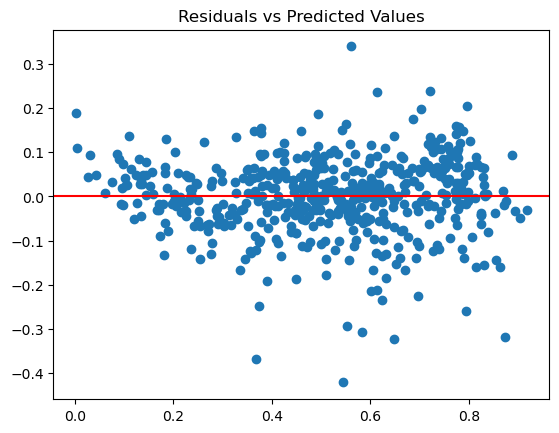

In [331]:
# Plotting Residuals vs Predicted Values on Train Dataset

plt.scatter(y_train_pred, Residuals)

# Draw a horizontal line at y=0

plt.axhline(y=0, color='r')  
plt.title("Residuals vs Predicted Values")
plt.show()

#### Predicting the Values on Test Dataset

In [320]:
# Predicting Values on Test Dataset

y_test_pred = stats_lr_model3.predict(X_test_rfe)

In [322]:
# Displaying the Predicted Values

print(y_test_pred)

184    0.394491
535    0.917963
299    0.424137
221    0.625172
152    0.623031
         ...   
400    0.328664
702    0.697518
127    0.485318
640    0.832861
72     0.290211
Length: 219, dtype: float64


#### Evaluating the Model

In [325]:
# Calculating the R-Squared Value for Test Dataset

r2_score(y_true = y_test, y_pred = y_test_pred)

0.8139594321774224

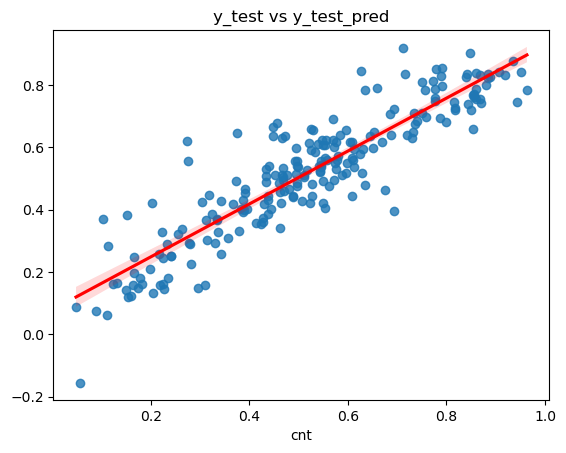

In [333]:
# Visualization of Actual vs. Predicted Bike Demand

sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'red'})  # Set alpha for scatter points

# Adding titles and labels with custom font sizes
plt.title('y_test vs y_test_pred')

# Display the plot
plt.show()

#### Final R-Squared Values
- Train Dataset - 0.84
- Test Dataset - 0.81

#### Final Inferences

1. Based on R-Squared Values returned, 84% of variance is explained in Train Dataset whereas 81% of variance in Test Dataset can be explained by the model.
2. Since both R-Squared values are close, one significant observation is overfitting didn't happen
3. Based on the co-efficients returned there is positive increase in the bike demand on yearly basis (i.e. 0.23), more demand if it is a working day (0.04), more demand if the temperature is warmer (0.53) and also some impact based on the Months & Seasons
4. However, there is lesser demand if either windspeed (-0.18) & humidity (-0.16) increases

#### Suggestions

1. Increasing bike availability based on sesons & specific months
2. Evaluating the strategy & fine tuning operational model/pricing strategy to ensure/meet bike availability needs

#### Summary 

In summary, our analysis has highlighted the key factors driving bike demand and offered valuable insights that BoomBikes can use to strengthen their business strategy. These findings emphasize the need to adapt to shifting conditions and customer preferences to enhance service quality and boost revenue.